In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors_ns = {
    1: 'r',
    2: 'm',
    3: 'b',
    4: 'k',
    5: 'g'
}

In [9]:
def filter_df_by_n(df, ns, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[df['nx'] == n]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [6]:
def filter_df(df, filter_statement, sorting_column):
    result = df[filter_statement]
    result = result.sort_values([sorting_column])
    
    return result

In [17]:
df_pde = pd.read_csv('rectangular-pde.csv')
df_generalised = pd.read_csv('rectangular-generalised-n.csv')
df_quantum_1d = pd.read_csv('rectangular-quantum-1d.csv')

df_generalised.drop(df_generalised[(df_generalised['nx'] == 6) | (df_generalised['nx'] == 7) | (df_generalised['ny'] == 6) | (df_generalised['ny'] == 7)].index, inplace=True)
df_quantum_1d.drop(df_quantum_1d[(df_quantum_1d['nx'] == 6) | (df_quantum_1d['nx'] == 7) | (df_quantum_1d['ny'] == 6) | (df_quantum_1d['ny'] == 7)].index, inplace=True)

In [18]:
nxs_pde = filter_df_by_n(df_pde, [1, 2, 3, 4, 5], 'ny')
nxs_generalised = filter_df_by_n(df_generalised, [1, 2, 3, 4, 5], 'ny')
nxs_quantum_1d = filter_df_by_n(df_quantum_1d, [1, 2, 3, 4, 5], 'ny')

In [24]:
def plot_n_graph(df_pde, df_gen_n, df_quantum, nx):
    plt.figure()

    plt.plot(df_pde[nx]['ny'], df_pde[nx]['test_metric'], '*--', label='PINN for fixed n')
    plt.plot(df_gen_n[nx]['ny'], df_gen_n[nx]['test_metric'], '*--', label='PINN for continuous n')
    plt.plot(df_quantum[nx]['ny'], df_quantum[nx]['test_metric'], '*--', label='PINN for discrete n')
    
    plt.title('n$_x$ = {}'.format(nx))
    plt.xlabel('n$_y$')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('ns-{}.png'.format(nx))

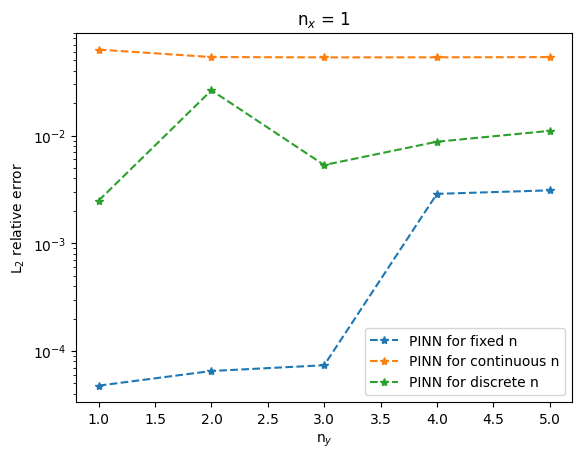

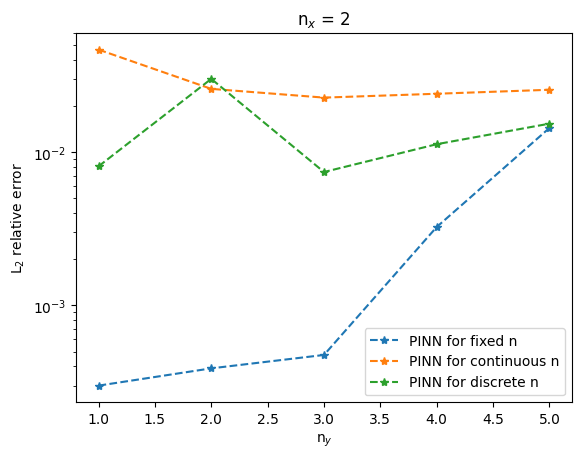

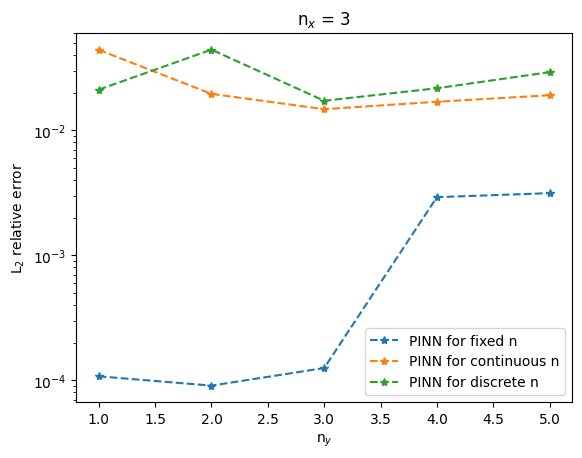

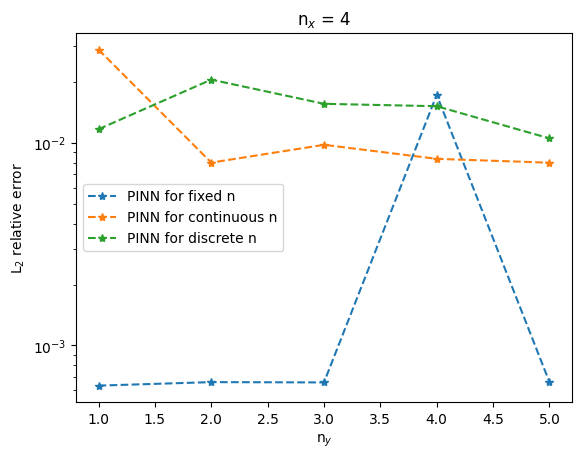

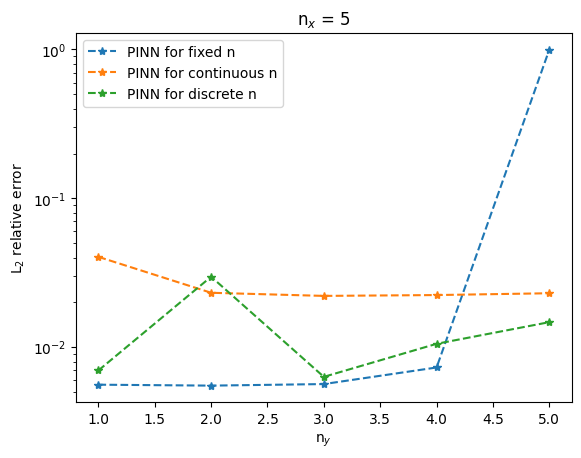

In [25]:
for nx in range(1, 6):
    plot_n_graph(nxs_pde, nxs_generalised, nxs_quantum_1d, nx)